In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
import joblib
from xgboost import XGBClassifier
from xgboost import plot_importance

In [34]:
df = pd.read_csv("employee_data.csv")

In [35]:
df.shape

(14249, 10)

In [36]:
df.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [37]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

array([[<Axes: title={'center': 'avg_monthly_hrs'}>,
        <Axes: title={'center': 'filed_complaint'}>,
        <Axes: title={'center': 'last_evaluation'}>],
       [<Axes: title={'center': 'n_projects'}>,
        <Axes: title={'center': 'recently_promoted'}>,
        <Axes: title={'center': 'satisfaction'}>],
       [<Axes: title={'center': 'tenure'}>, <Axes: >, <Axes: >]],
      dtype=object)

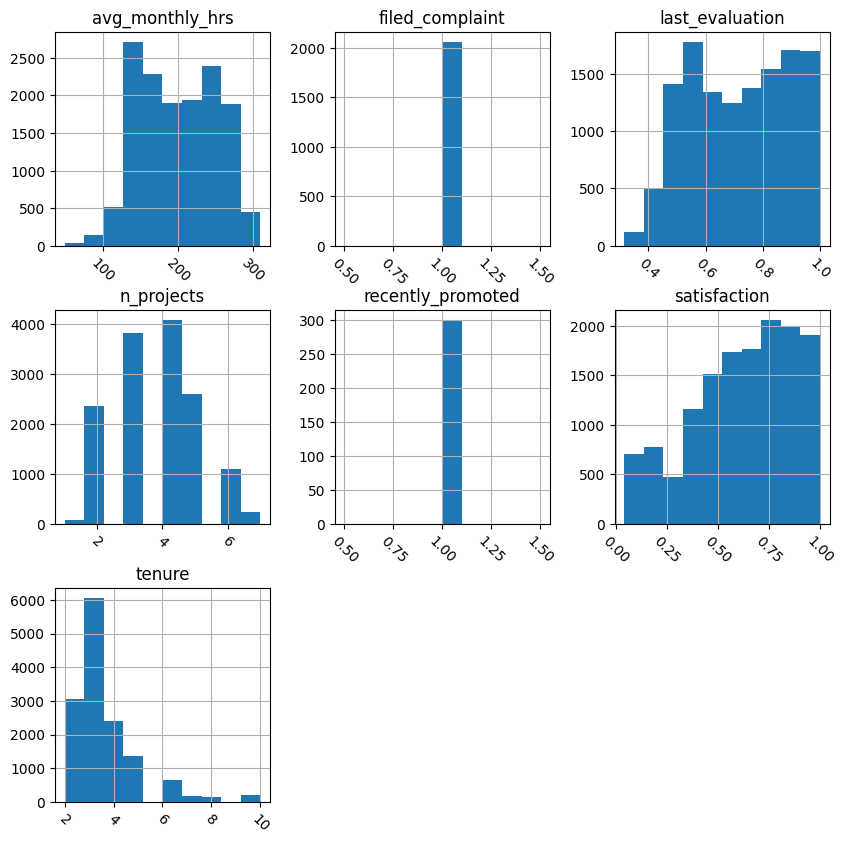

In [38]:
df.hist(figsize=(10,10), xrot=-45)

<Axes: xlabel='avg_monthly_hrs', ylabel='Density'>

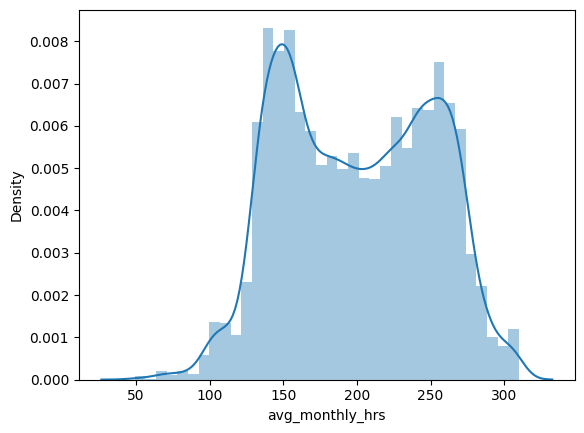

In [39]:
sns.distplot(df['avg_monthly_hrs'])

In [40]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [41]:
df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


In [42]:
df['department'].value_counts()

department
sales                     3923
engineering               2592
support                   2122
IT                        1161
product                    860
marketing                  819
finance                    728
management                 595
information_technology     209
temp                       181
admin                      176
procurement                174
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='department'>

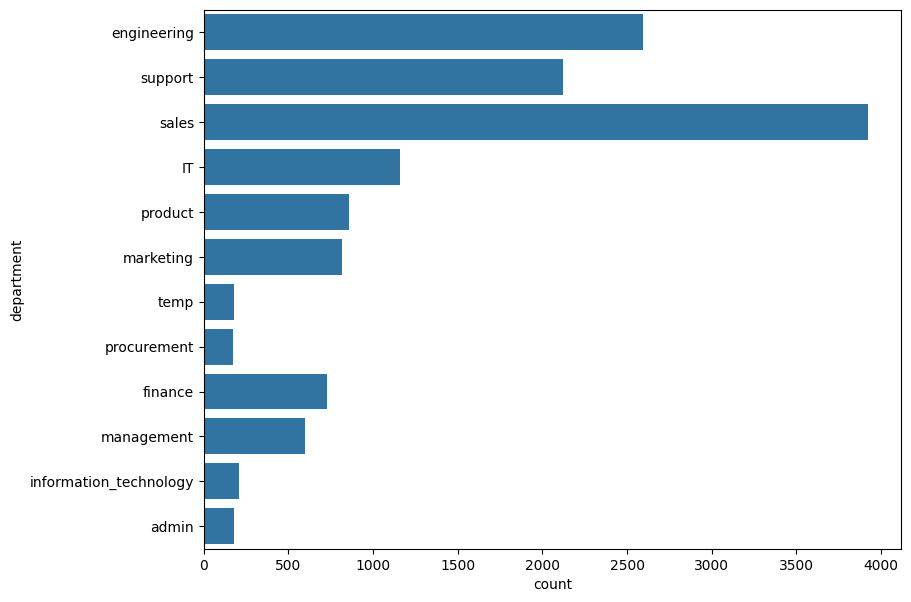

In [43]:
plt.figure(figsize=(9,7))
sns.countplot(y='department', data=df)

In [44]:
df['salary'].value_counts()

salary
low       6952
medium    6146
high      1151
Name: count, dtype: int64

In [45]:
df['status'].value_counts()

status
Employed    10857
Left         3392
Name: count, dtype: int64

<Axes: xlabel='satisfaction', ylabel='status'>

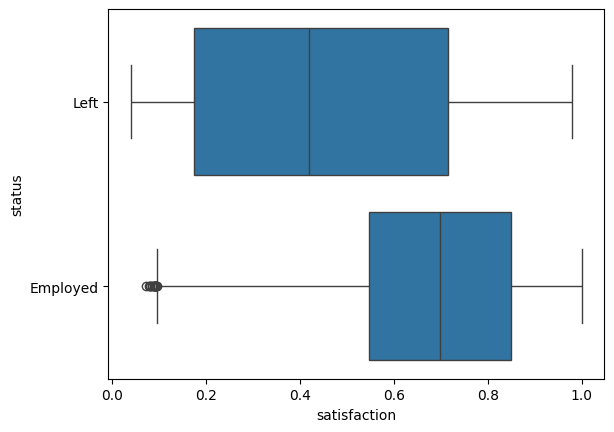

In [46]:
sns.boxplot(y='status', x='satisfaction', data=df)

<Axes: xlabel='last_evaluation', ylabel='status'>

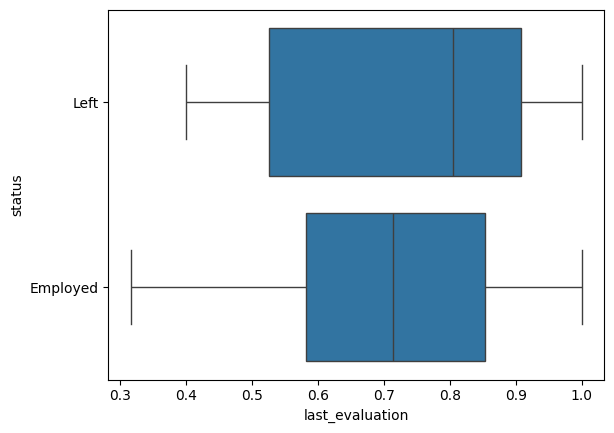

In [47]:
sns.boxplot(y='status', x='last_evaluation', data=df)

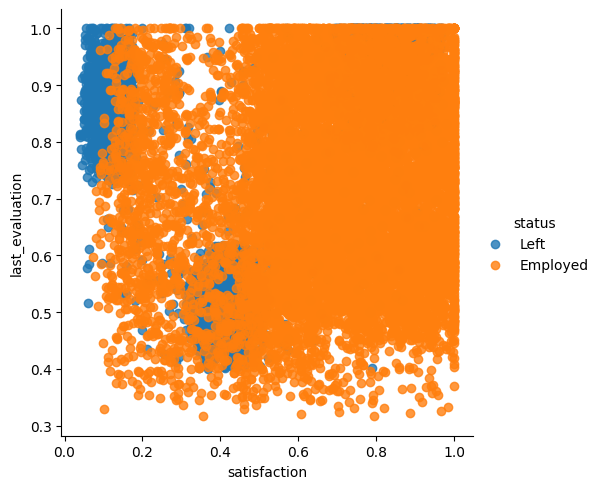

In [50]:
sns.lmplot(x='satisfaction', y='last_evaluation', hue='status', data=df, fit_reg=False)

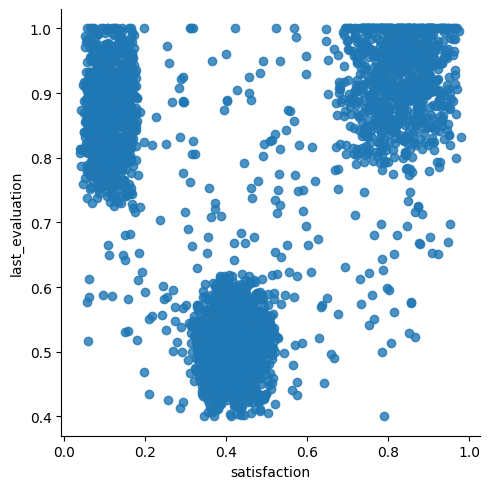

In [51]:
sns.lmplot(x='satisfaction', y='last_evaluation', data=df[df.status == 'Left'], fit_reg=False)

In [52]:
df.corr()

ValueError: could not convert string to float: 'engineering'